# Chapter 6 - Exercise 1: Bank

## Sử dụng tập dữ liệu bank.csv chứa thông tin liên quan đến các chiến dịch tiếp thị trực tiếp - the direct marketing campaigns (dựa trên các cuộc gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. 

### Thông thường, cần có nhiều contact cho cùng một khách hàng, để truy cập xem liệu có sản phẩm (tiền gửi ngân hàng có kỳ hạn - bank term deposit) sẽ được đăng ký (yes) hay không (no). 

### Tập dữ liệu chứa một số thông tin khách hàng (như age, job...) và thông tin liên quan đến chiến dịch (chẳng hạn như contact hoặc communication type, day, month và duration của contact...).

### Đối với chiến dịch tiếp thị tiếp theo, công ty muốn sử dụng dữ liệu này và chỉ liên hệ với những khách hàng tiềm năng sẽ đăng ký tiền gửi có kỳ hạn, do đó giảm bớt nỗ lực cần thiết để liên hệ với những khách hàng không quan tâm. 

### => Để làm được điều này, cần tạo một mô hình có thể dự đoán liệu khách hàng có đăng ký tiền gửi có kỳ hạn hay không (y).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
bank = pd.read_csv('Data/bank-full.csv', sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
x = bank.drop('y', axis = 1)
y = bank['y']

categ_features = x.select_dtypes(include='object').columns.to_list()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## <span style='color:yellow'> Build Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

Onehot_transformer = ColumnTransformer(transformers=[('OneHotEnc',OneHotEncoder(handle_unknown='ignore'), categ_features)], 
                                       remainder='passthrough',
                                      force_int_remainder_cols=False)

treeC_pipe = Pipeline([
    ("Onehot_Encoder", Onehot_transformer),
    ("SMOTE_oversample", SMOTE(random_state=1)),
    ("Tree_Classifier", DecisionTreeClassifier(criterion='gini', min_samples_split=100))
])

treeC_pipe.fit(x_train, y_train)

Pipeline(steps=[('Onehot_Encoder',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('OneHotEnc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('SMOTE_oversample', SMOTE(random_state=1)),
                ('Tree_Classifier',
                 DecisionTreeClassifier(min_samples_split=100))])

Accuracy score of Tree_Classifier on train set: 0.9168957563118147
Accuracy score of Tree_Classifier on test set: 0.8975228546151578


Confusion matrix:
         no  yes
no   11250  763
yes    627  924


Classification report:
               precision    recall  f1-score   support

          no       0.95      0.94      0.94     12013
         yes       0.55      0.60      0.57      1551

    accuracy                           0.90     13564
   macro avg       0.75      0.77      0.76     13564
weighted avg       0.90      0.90      0.90     13564




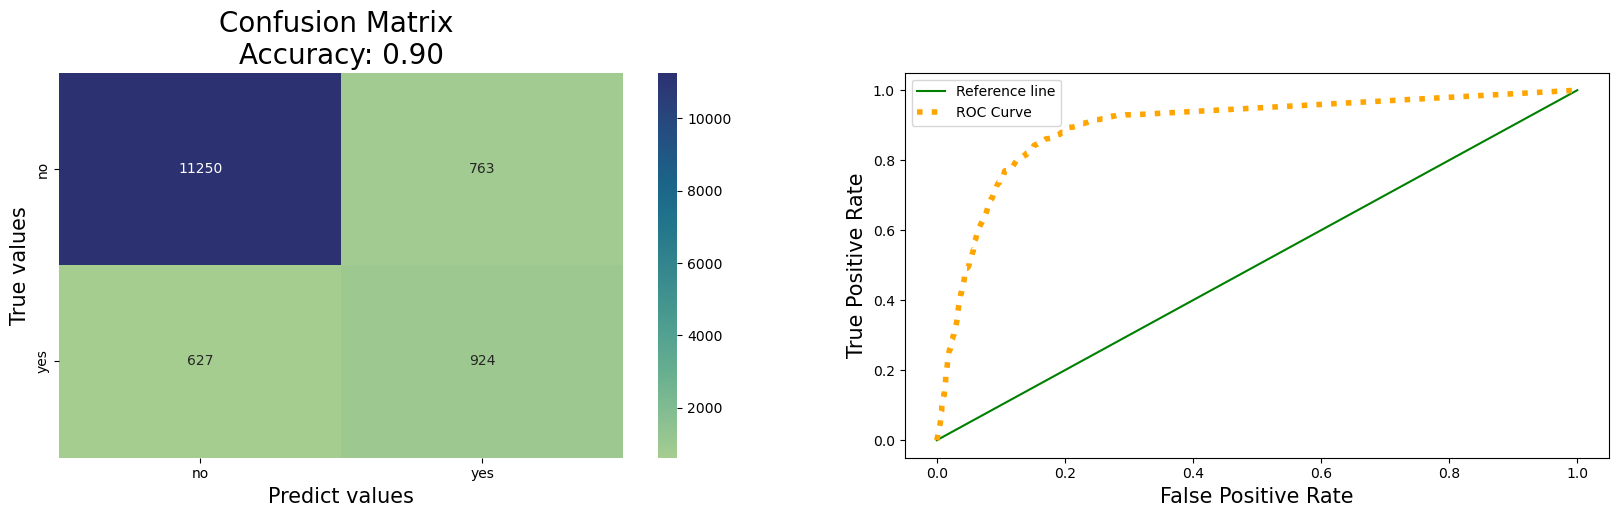

In [35]:
y_test_pred = treeC_pipe.predict(x_test)
y_test_proba = treeC_pipe.predict_proba(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

print(f'Accuracy score of Tree_Classifier on train set: {accuracy_score(y_train, treeC_pipe.predict(x_train))}')
print(f'Accuracy score of Tree_Classifier on test set: {accuracy_score(y_test, y_test_pred)}')

labels = ['no', 'yes']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\n\nConfusion matrix:\n {cm_df}')

print(f'\n\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')
print()

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='yes')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()

## <span style='color:yellow'> Visualize the tree

In [38]:
#print(treeC_pipe.named_steps['Onehot_Encoder'].get_feature_names_out())
#print()
features_encoded = [feat.replace("OneHotEnc__", "").replace("remainder__", "") for feat in treeC_pipe.named_steps['Onehot_Encoder'].get_feature_names_out()]
print(features_encoded)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


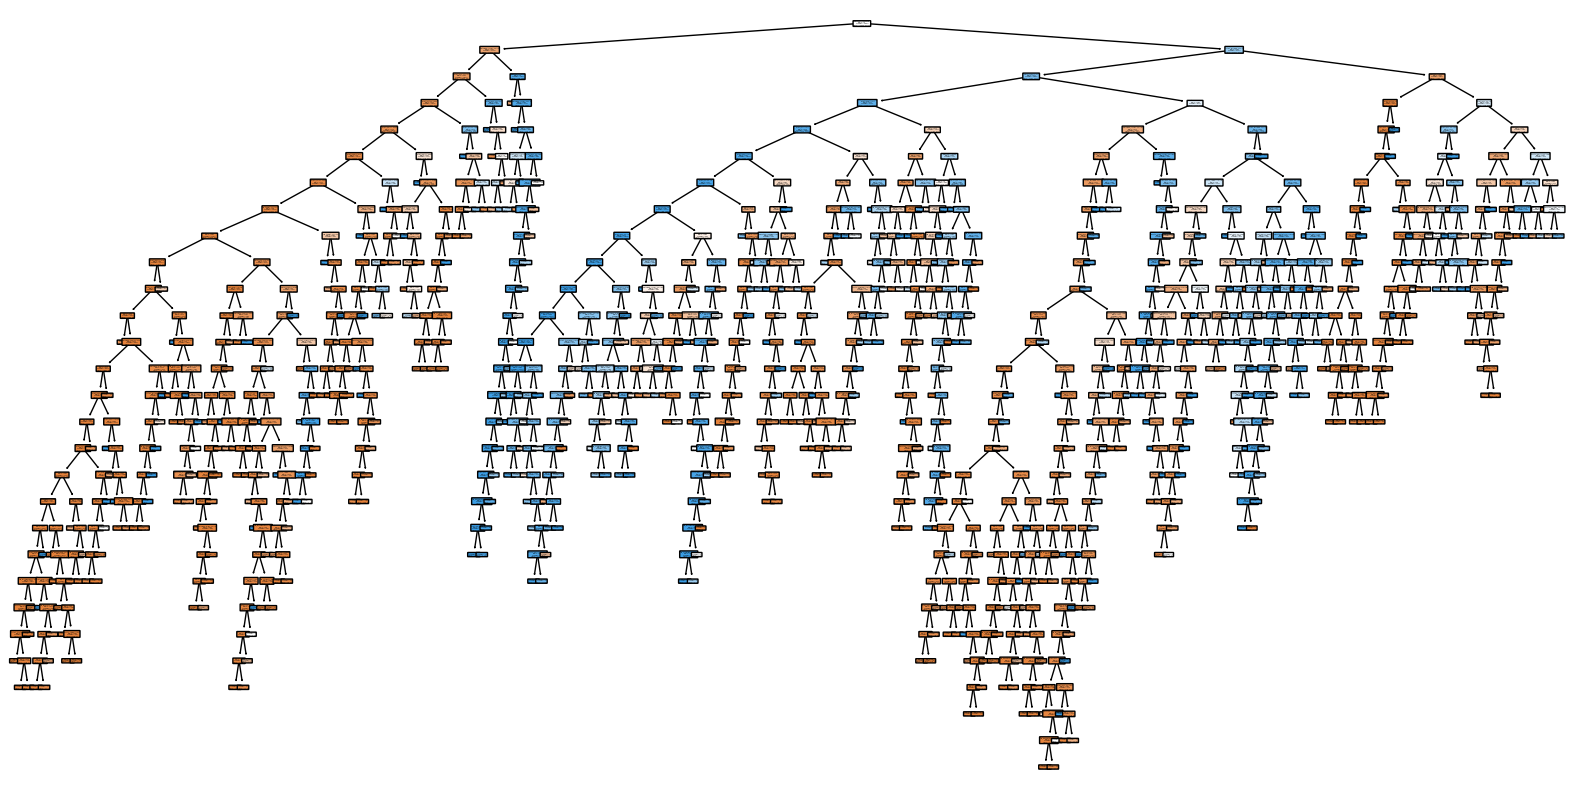

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(treeC_pipe.named_steps['Tree_Classifier'],
          filled=True,  # Color nodes by class
          feature_names = features_encoded,  # If you have feature names
          #class_names=class_names,      # If you have class names
          rounded=True,                 # Round node corners
          proportion=False)             # Show counts instead of proportions)

plt.show()